<a href="https://colab.research.google.com/github/navisihota/Machine-Learning/blob/main/Logistic%20Regression/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
**Importing necessary liblraries**


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

Installing missingno library for analysing the missing values

In [28]:
pip install missingno

**Loading Training and Testing Datasets**

In [29]:
titanic_data = pd.read_csv('https://github.com/navisihota/Dataset/blob/main/titanic.csv?raw=true')

In [30]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the information of the dataset


*   Analysing the datatype of each column
*   Analysing the total number of records





In [31]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing Values**

In [32]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ploting the number of records each column have with the help of missingno liblrary

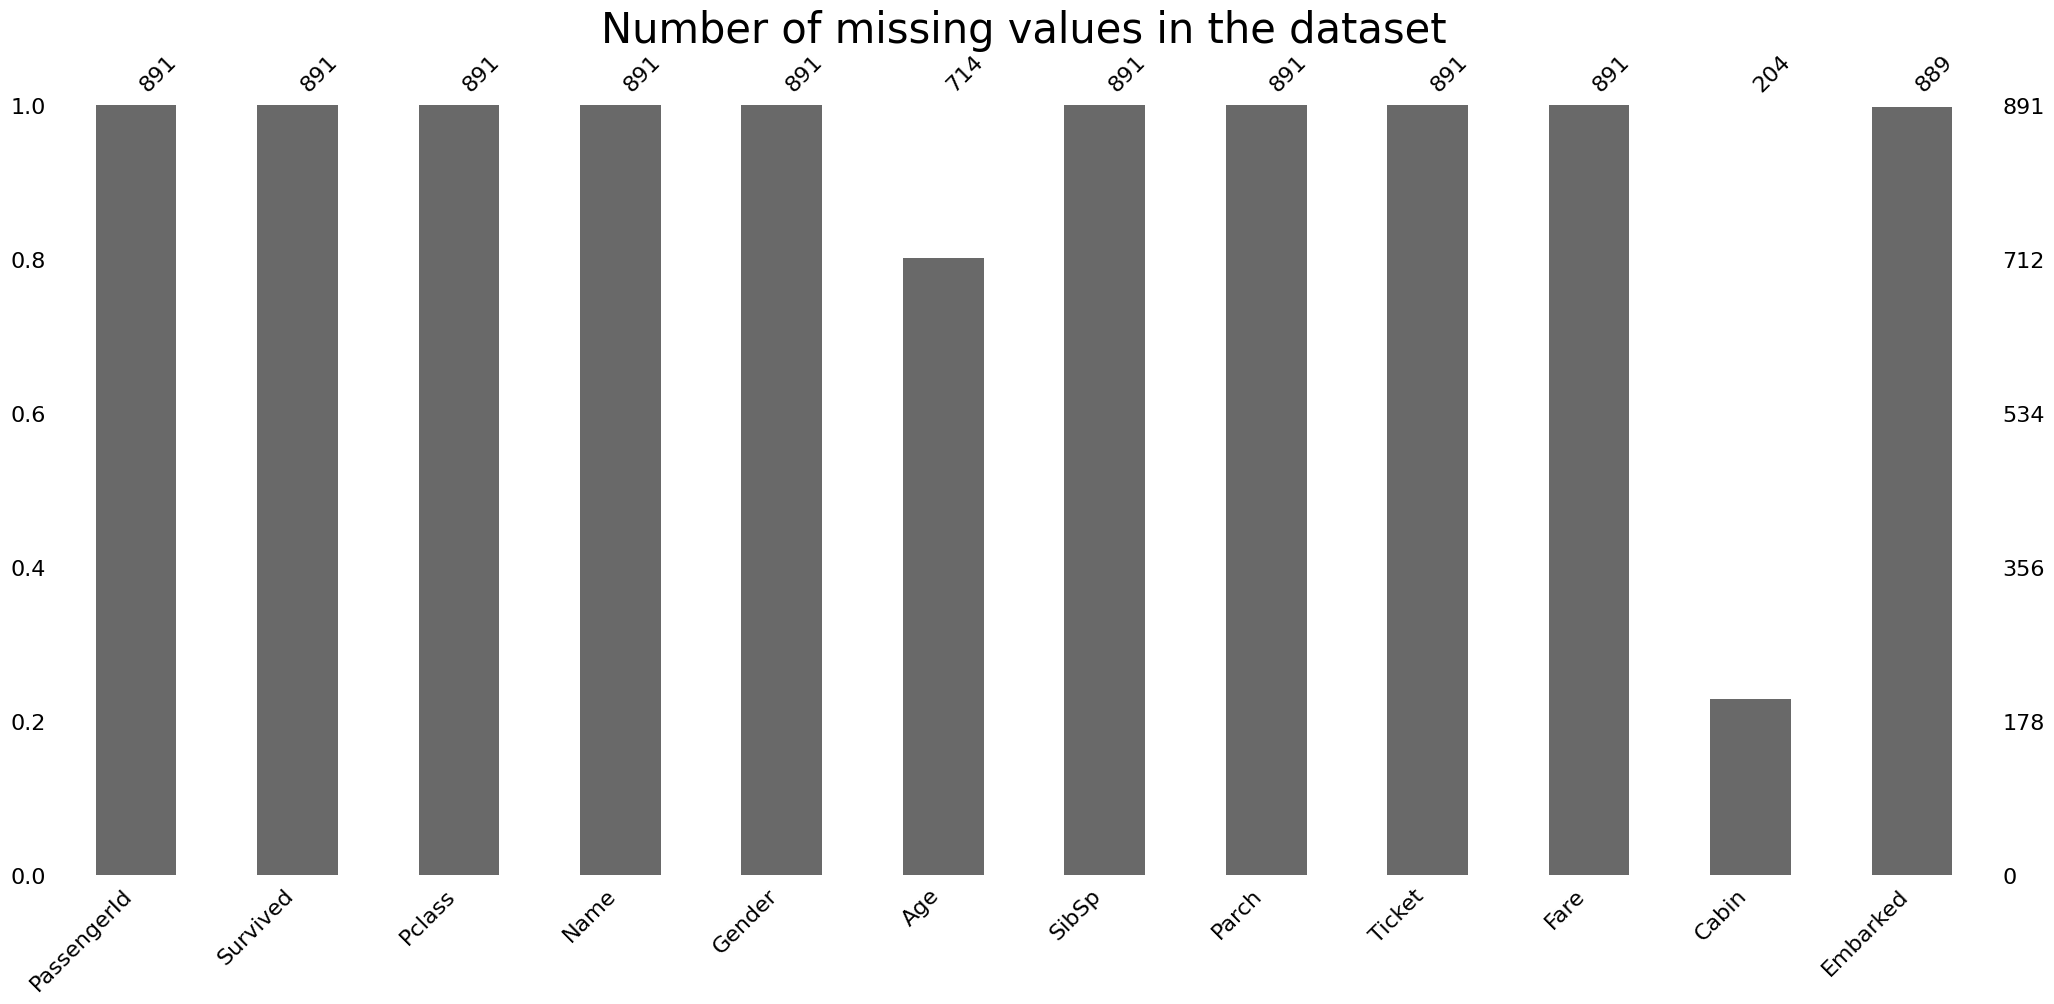

In [33]:
msno.bar(titanic_data)
plt.title('Number of missing values in the dataset',size=30)
plt.show()

Visualizing the Null values distribution all over the dataset with the help of missingno

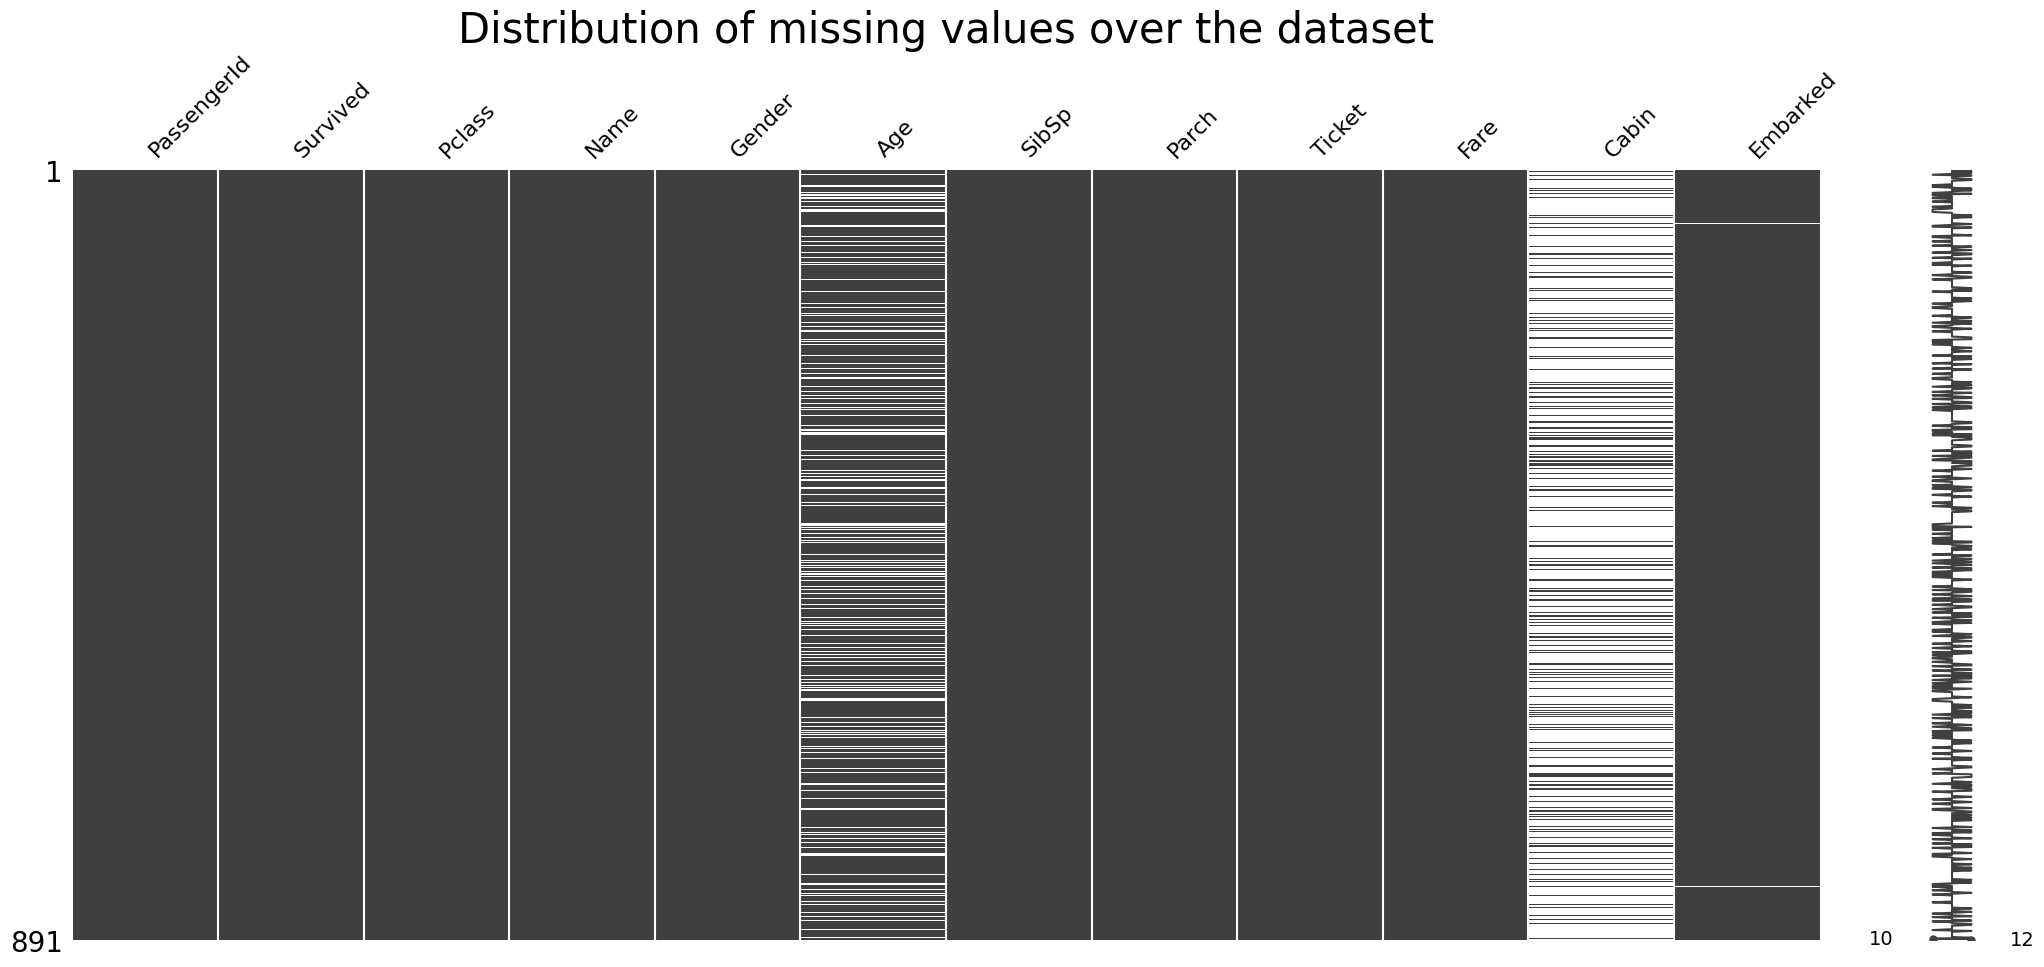

In [34]:
msno.matrix(titanic_data)
plt.title('Distribution of missing values over the dataset',size=30)
plt.show()

Relationships between two predictor variables(Age and Fare) using the seaborn regressin plot and setting title,grid and figure size with the help of matplotlib.

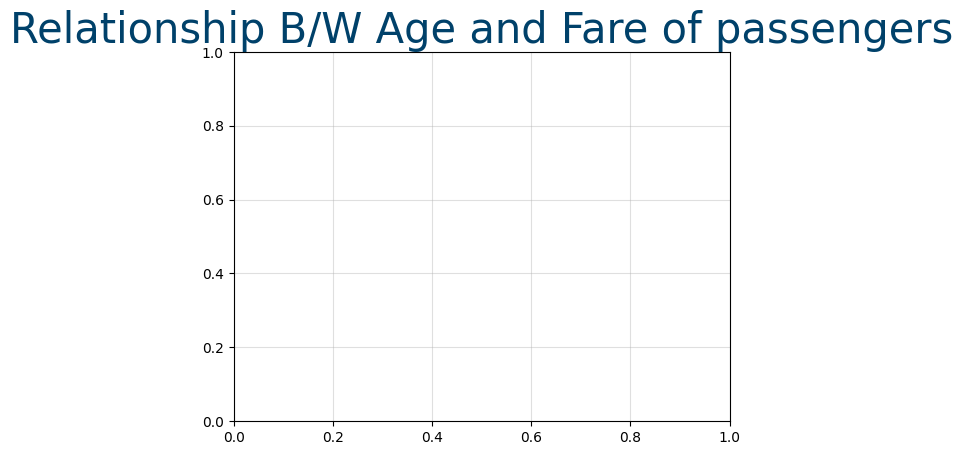

In [35]:
plt.title('Relationship B/W Age and Fare of passengers',size=30,color='#00416A')
plt.grid(alpha=0.4)
plt.show()

There is a incorrect value (11) in the Survived column in the rows shown bellow

In [36]:
titanic_data[titanic_data['Survived']==11]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [37]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Replacing 11 with 1 for solving the incorrect value problem

In [38]:
titanic_data['Survived'].replace(11,1,inplace=True)

In [39]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Relationships between a predictor variable and the predicted (target) variable(Age and Survived) using the seaborn regressin plot and setting title,grid and figure size with the help of matplotlib.

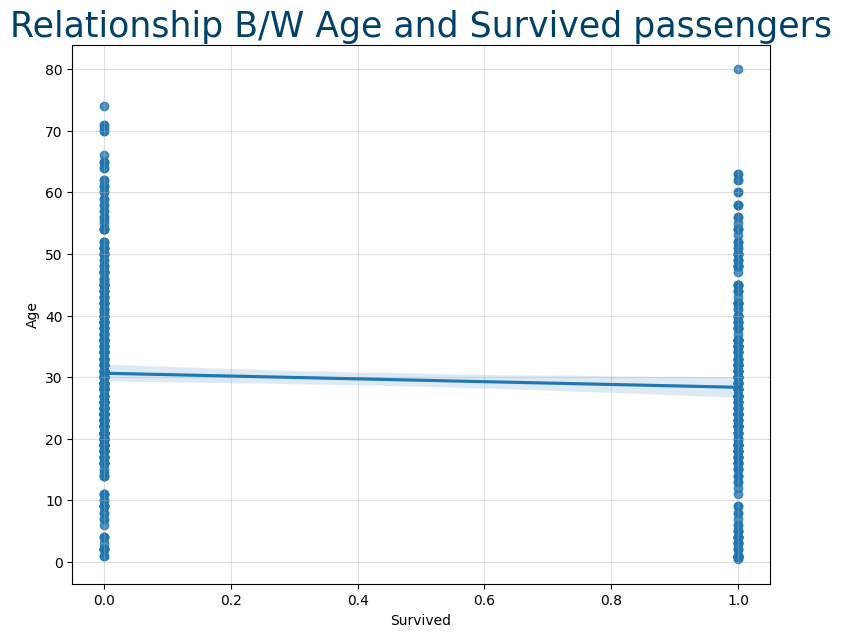

In [40]:
plt.figure(figsize=(9,7))
sns.regplot(data=titanic_data,x='Survived',y='Age')
plt.title('Relationship B/W Age and Survived passengers',size=25,color='#00416A')
plt.grid(alpha=0.4)
plt.show()

Now we are checking the correlation between the predictor variables and the target variable(Survived). So we can understand which feature effect most the target column.

In [46]:
numeric_columns = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
numeric_data = titanic_data[numeric_columns]

In [47]:
corr_matrix = numeric_data.corr()

In [48]:
corr = corr_matrix.loc[numeric_columns, ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

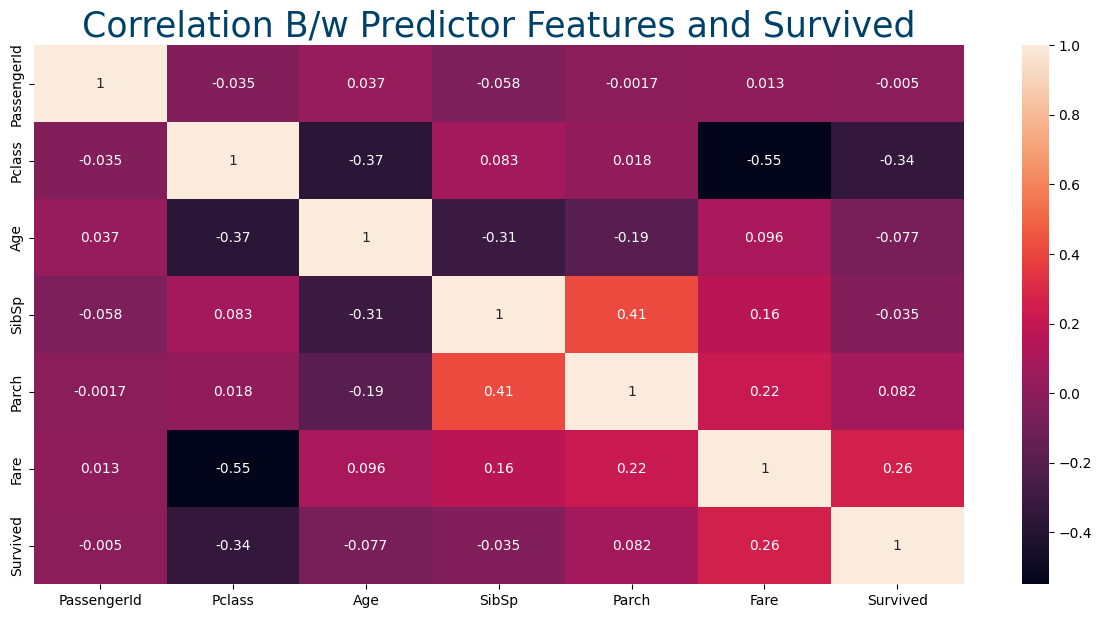

In [50]:
plt.figure(figsize=(15,7))
sns.heatmap(data=corr,annot=True)
plt.title('Correlation B/w Predictor Features and Survived',size=25,color='#00416A')
plt.show()

Visualizing Data to understand the data and filling the missing values

<ipython-input-51-f81fc541adbb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_data,x='Survived',palette='vlag')


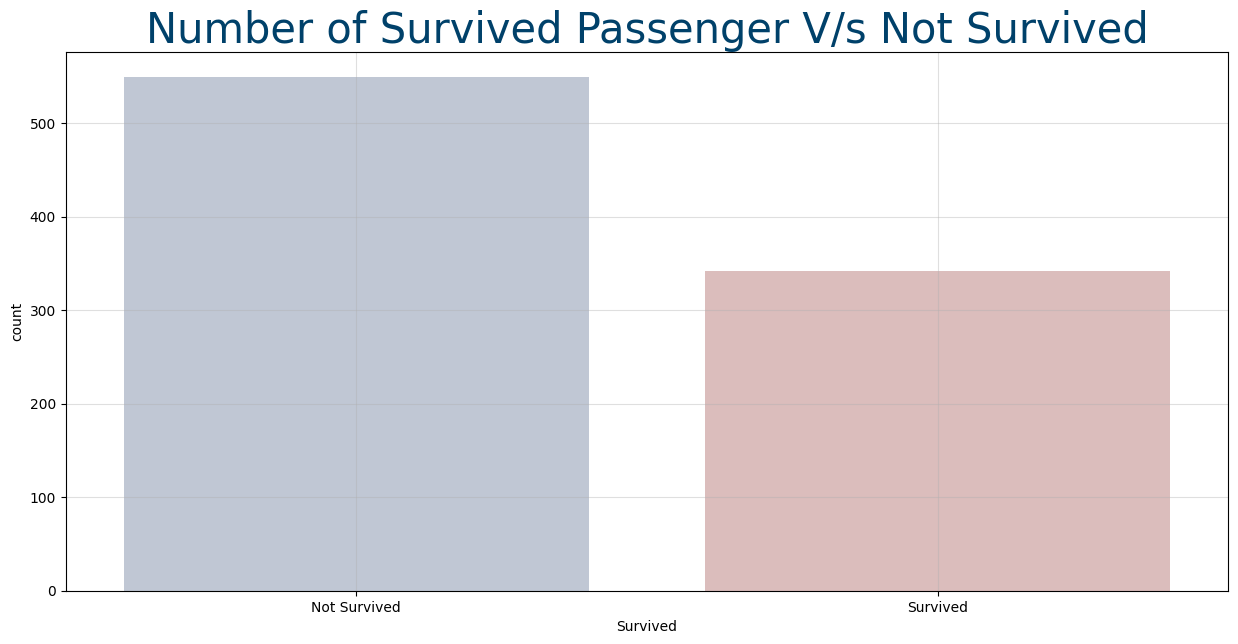

In [51]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Survived',palette='vlag')
plt.title('Number of Survived Passenger V/s Not Survived',size=30,color='#00416A')
plt.grid(alpha=0.4)
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()

Here we see Gender wise the people Survived and not Survived. Certainly it is seen that females are given preference over male while evacuating the people.

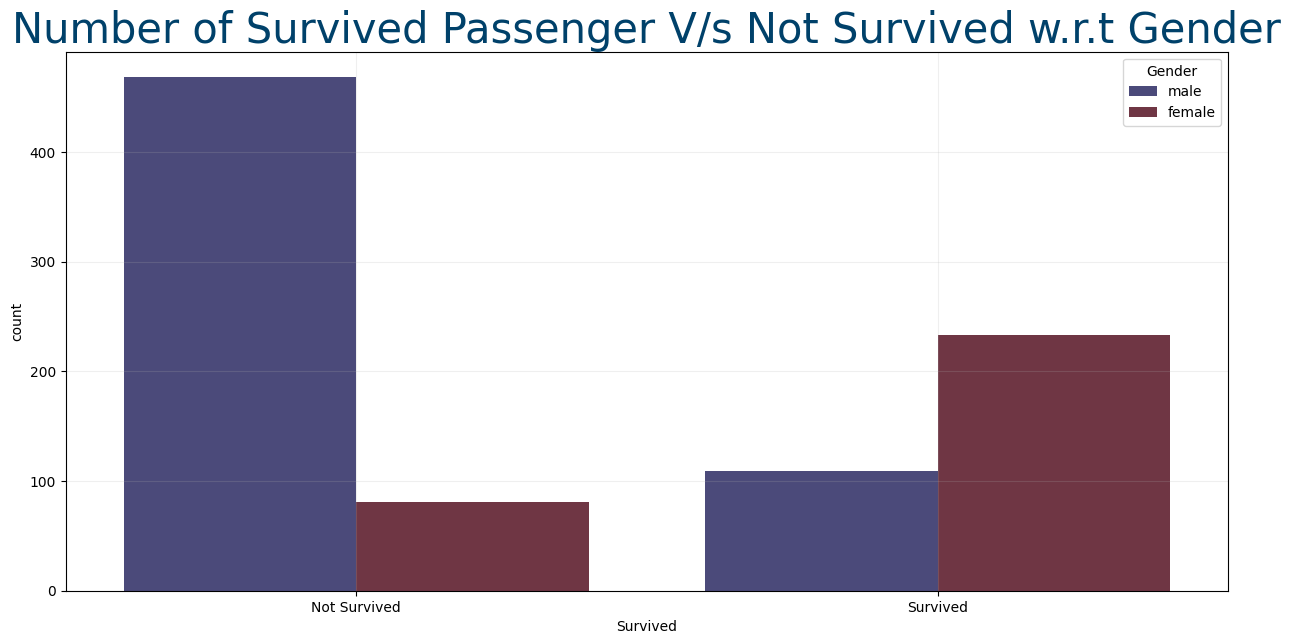

In [52]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Survived',hue='Gender',palette='icefire')
plt.title('Number of Survived Passenger V/s Not Survived w.r.t Gender',size=30,color='#00416A')
plt.grid(alpha=0.2)
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()

<ipython-input-53-692e4052f798>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_data,x='Pclass',palette='flare')


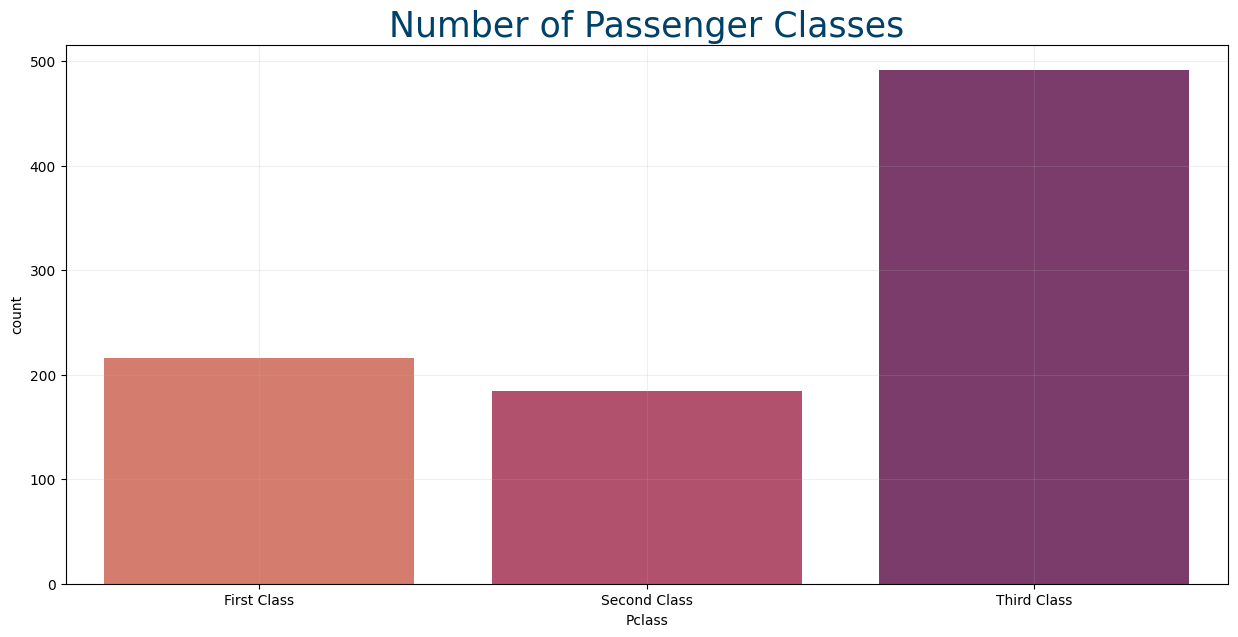

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Pclass',palette='flare')
plt.title('Number of Passenger Classes',size=25,color='#00416A')
plt.grid(alpha=0.2)
plt.xticks([0,1,2],['First Class','Second Class','Third Class'])
plt.show()

<ipython-input-54-301e6dc5252c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_data,x='Pclass',y='Age',palette='vlag')


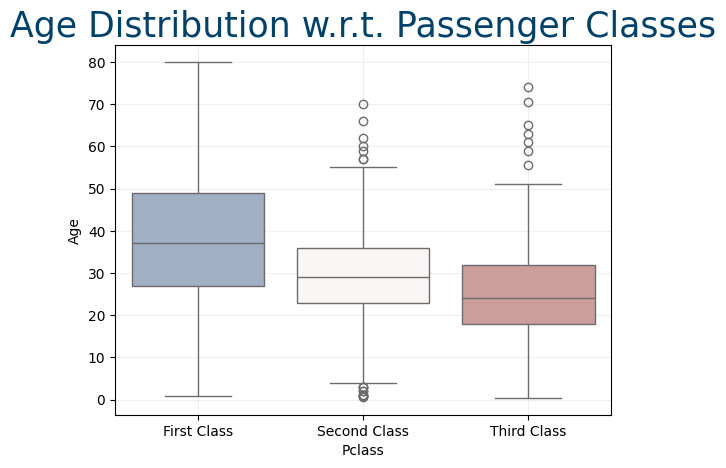

In [54]:
sns.boxplot(data=titanic_data,x='Pclass',y='Age',palette='vlag')
plt.title('Age Distribution w.r.t. Passenger Classes',size=25,color='#00416A')
plt.grid(alpha=0.2)
plt.xticks([0,1,2],['First Class','Second Class','Third Class'])
plt.show()

Now here’s a Boxplot which will be very useful when we will be filling the values in the Age Column. Boxplot shows us the mean age of Males and Female according to the class. The diamond like shape are the outliers in our dataset, which are numbered so that will not be a problem

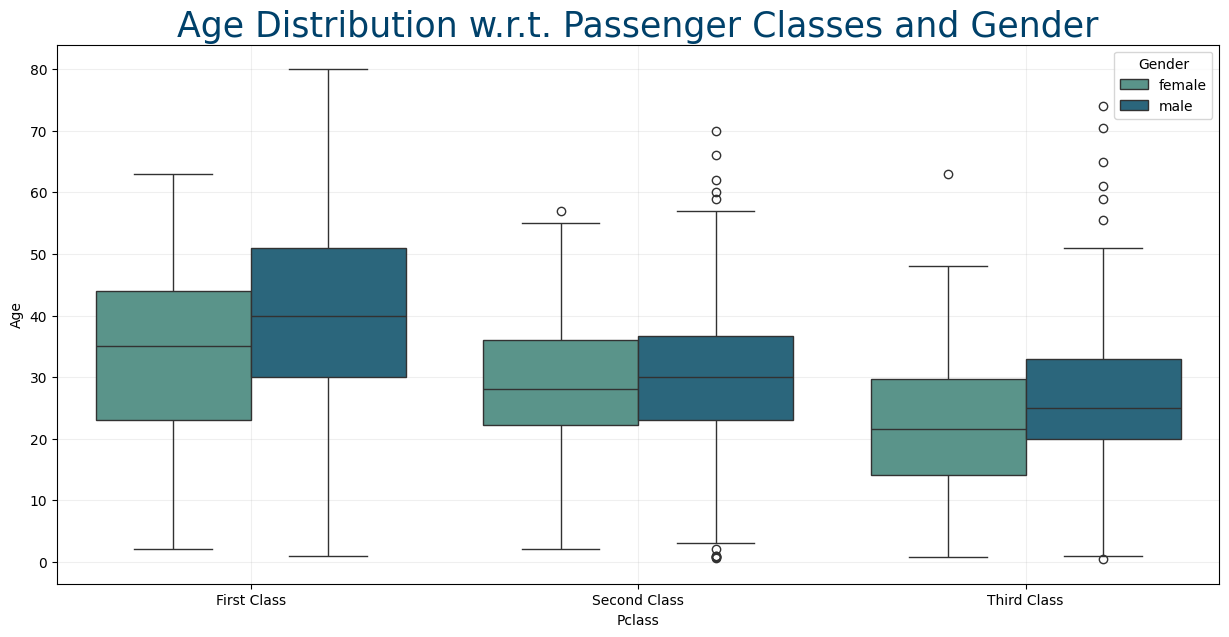

In [55]:
plt.figure(figsize=(15,7))
sns.boxplot(data=titanic_data,x='Pclass',y='Age',hue='Gender',palette='crest')
plt.title('Age Distribution w.r.t. Passenger Classes and Gender',size=25,color='#00416A')
plt.xticks([0,1,2],['First Class','Second Class','Third Class'])
plt.grid(alpha=0.2)
plt.show()

In [60]:
def fill_age(row):
  pclass = row[0]
  age = row[1]
  gender = row[2]
  if pd.isnull(age):
    if gender=='male':
      if pclass==1:
        return 41
      elif pclass==2:
        return 30
      elif pclass==3:
        return 25
    elif gender=='female':
      if pclass==1:
        return 37
      elif pclass==2:
        return 27
      elif pclass==3:
        return 22
  else:
    return age

In [62]:
titanic_data['Age'] = titanic_data[['Pclass','Age','Gender']].apply(fill_age,axis=1)


In [63]:
titanic_data['Has Cabin'] = titanic_data["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)

In [64]:
titanic_data['Has Cabin'].value_counts()

Has Cabin
0    687
1    204
Name: count, dtype: int64

In [65]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Has Cabin        0
dtype: int64

In [66]:
titanic_data.drop(['PassengerId','Name','Ticket',"Cabin"],axis=1,inplace=True)

In [67]:
titanic_data.dropna(inplace=True)

In [68]:
titanic_data.reset_index(drop=True,inplace=True)

In [69]:
titanic_data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Has Cabin
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


**Using 'Feature engineering,' to create new features from the original data**

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [71]:
label_enco = LabelEncoder()
one_hot = OneHotEncoder()

In [72]:
label_enco.fit(titanic_data['Gender'])

LabelEncoder()

In [73]:
titanic_data['Gender'] = label_enco.transform(titanic_data['Gender'])

In [74]:
one_hot.fit(titanic_data[['Embarked']])

OneHotEncoder()

In [75]:
temp_arr = one_hot.transform(titanic_data[['Embarked']]).toarray()

In [76]:
temp_arr

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [77]:
one_hot.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [78]:
temp_data = pd.DataFrame(temp_arr,columns=['C', 'Q', 'S'],dtype='int')

In [79]:
temp_data.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [80]:
titanic_data = pd.concat([titanic_data,temp_data],axis=1)

In [81]:
titanic_data.drop('Embarked',axis=1,inplace=True)

In [82]:
titanic_data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Has Cabin,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,1


**Build and tune the model**

In [83]:
X = titanic_data.drop('Survived',axis=1)
Y = titanic_data['Survived']

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [85]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [86]:
logistic_model = logistic.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
predictions = logistic_model.predict(X_test)

In [88]:
# Report model performance results.
logistic_model_accuracy = logistic_model.score(X_test, Y_test)
#Change this
print('Model Accuracy is {0:.2F}%'.format(logistic_model_accuracy * 100))

Model Accuracy is 81.46%


In [89]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(predictions,Y_test))

[[96 22]
 [11 49]]


In [90]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       118
           1       0.69      0.82      0.75        60

    accuracy                           0.81       178
   macro avg       0.79      0.82      0.80       178
weighted avg       0.83      0.81      0.82       178



**SOME QUESTIONS**

How is survival influenced based on passenger ticket class?

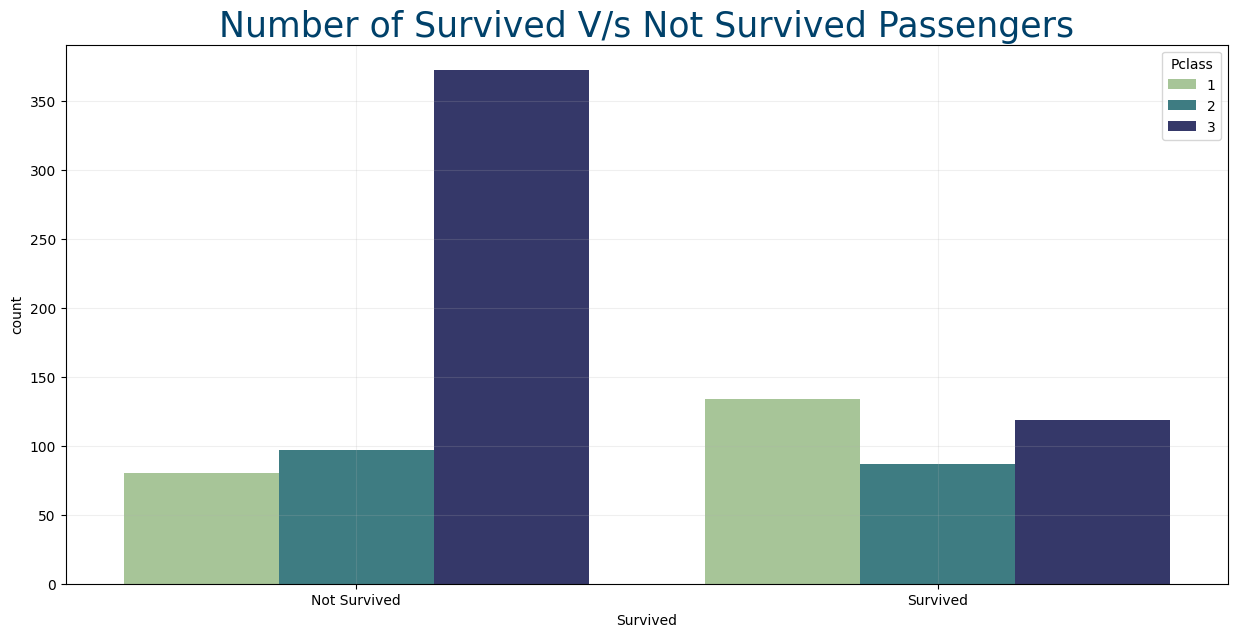

In [91]:
plt.figure(figsize=(15,7))
sns.countplot(data=titanic_data,x='Survived',hue='Pclass',palette='crest')
plt.title('Number of Survived V/s Not Survived Passengers',size=25,color='#00416A')
plt.xticks([0,1],['Not Survived','Survived'])
plt.grid(alpha=0.2)
plt.show()

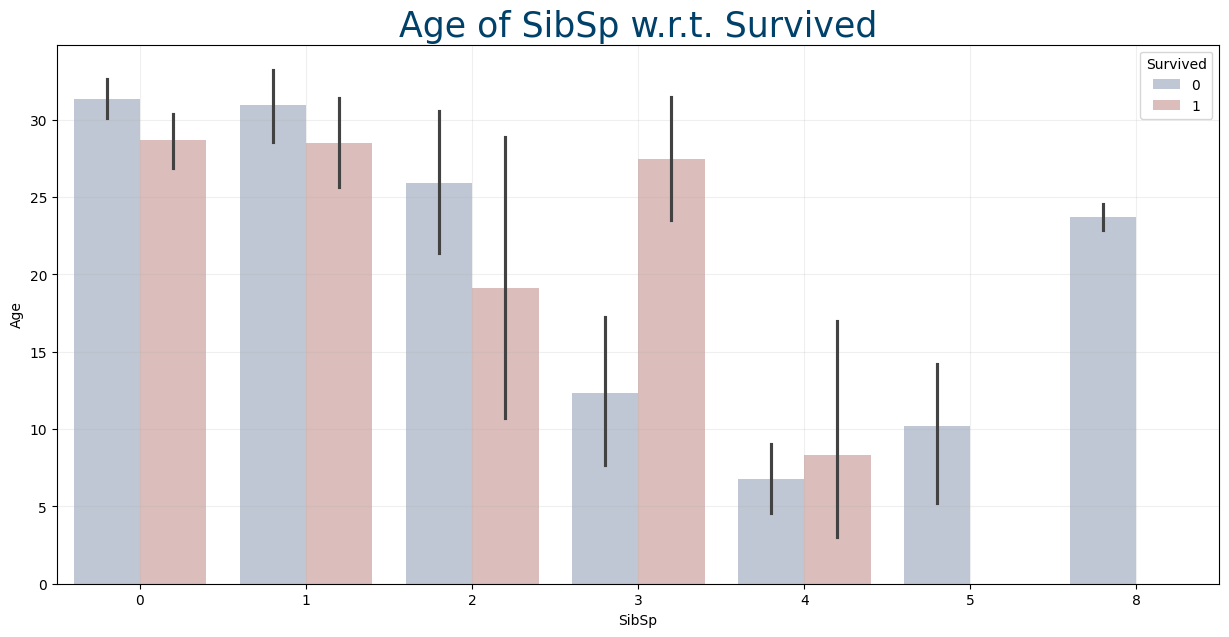

In [92]:
plt.figure(figsize=(15,7))
sns.barplot(data=titanic_data,x='SibSp',y='Age',hue='Survived',palette='vlag')
plt.title('Age of SibSp w.r.t. Survived',size=25,color='#00416A')
plt.grid(alpha=0.2)
plt.show()